In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model
model = nn.Linear(2, 1)

# Define a loss function
criterion = nn.MSELoss()

# Define an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy input and target
inputs = torch.tensor([[1.0, -1.0]], requires_grad=True)
target = torch.tensor([[1.0]])

# Forward pass
output = model(inputs)
loss = criterion(output, target)

# Backward pass
loss.backward()

# Access gradients
for name, param in model.named_parameters():
    print(f"Gradient for {name}: {param.grad}")

Gradient for weight: tensor([[-5.0159,  5.0159]])
Gradient for bias: tensor([-5.0159])


In [12]:
from kan import *
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Kolmogorov-Arnold network
#kan = KolmogorovArnoldNetwork(input_dim=2, hidden_dim=10, output_dim=1)

width = [2, 5, 1]
device = 'cpu'
sp_trainable = False
sb_trainable = False
affine_trainable = False
args = {
        'grid': 'uniform',
        'k': 5,
        'seed': 0,
        'base_fun': 'relu',
        'spline_noise_scale': 0.0,
        'mode': 'train',
        'init_mode': 'default',
        'ckpt_path': None,
        'sp_trainable': False,
        'sb_trainable': False,
        'affine_trainable': False,
        'requires_grad': False
        }

model = KAN(
        width=width, device=device,
        #grid=args.grid, k=args.k, seed=args.seed,
        sp_trainable=sp_trainable, sb_trainable=sb_trainable, affine_trainable=affine_trainable,
        #base_fun=args.base_fun,
        #noise_scale=args.spline_noise_scale,
        #mode=args.mode,
        #init_mode=args.init_mode,
        #ckpt_path=ckpt_folder
        )

checkpoint directory created: ./model
saving model version 0.0


In [13]:

# # Dummy input and target
# inputs = torch.tensor([[1.0, 2.0]], requires_grad=True)
# target = torch.tensor([[1.0]])

inputs = torch.tensor([[1.0, 2.0],[3.0, 4.0]], requires_grad=True)
target = torch.tensor([[1.0, 2.0]])

# Forward pass
output = model(inputs)

loss = nn.MSELoss()(output, target)

# Backward pass
loss.backward()

# Extract gradients
coefs = []
activations = []
gradients = []


for layer_index, (act_fun, preacts, postacts, postsplines) in enumerate(zip(model.act_fun, model.spline_preacts, model.spline_postacts, model.spline_postsplines)):

        print(f"Layer {layer_index}")
        coef = act_fun.coef

        activations.append(postacts.detach().numpy())
        coefs.append(coef.detach().numpy())
        gradients.append(coef.grad.detach().numpy())   



Layer 0
Layer 1


/home/student/l/luniehaus/cv_home/dev-uos/miniconda/envs/pykan/lib/python3.9/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [14]:
print([c for coef in coefs for c in coef.flatten()])

[np.float32(0.005832507), np.float32(0.031396307), np.float32(0.02316124), np.float32(-0.04083301), np.float32(0.02844897), np.float32(0.010846343), np.float32(-0.014105748), np.float32(-0.03745623), np.float32(0.03151712), np.float32(-0.07381274), np.float32(0.082545504), np.float32(0.02819743), np.float32(-0.010039832), np.float32(-0.022580236), np.float32(0.0422023), np.float32(-0.036660567), np.float32(0.054155286), np.float32(0.018057384), np.float32(0.013885742), np.float32(0.041148927), np.float32(-0.037670698), np.float32(-0.0073764157), np.float32(-0.062225875), np.float32(-0.017061405), np.float32(-0.019573757), np.float32(-0.06941167), np.float32(0.014789317), np.float32(-0.011618217), np.float32(-0.06445104), np.float32(-0.015820172), np.float32(0.0148252295), np.float32(0.04708209), np.float32(-0.023238327), np.float32(0.018863034), np.float32(-0.037849348), np.float32(-0.012165281), np.float32(-0.004603137), np.float32(-0.016199777), np.float32(0.00768464), np.float32(0.0

# Coefs

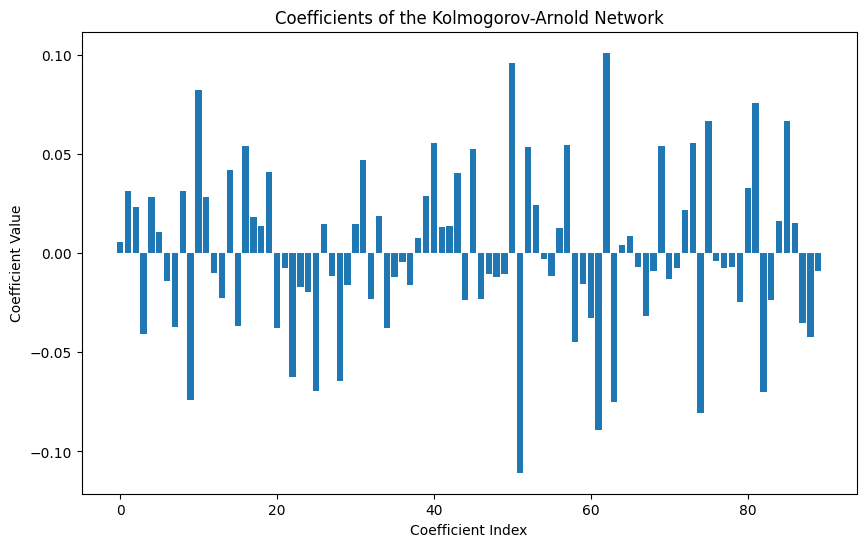

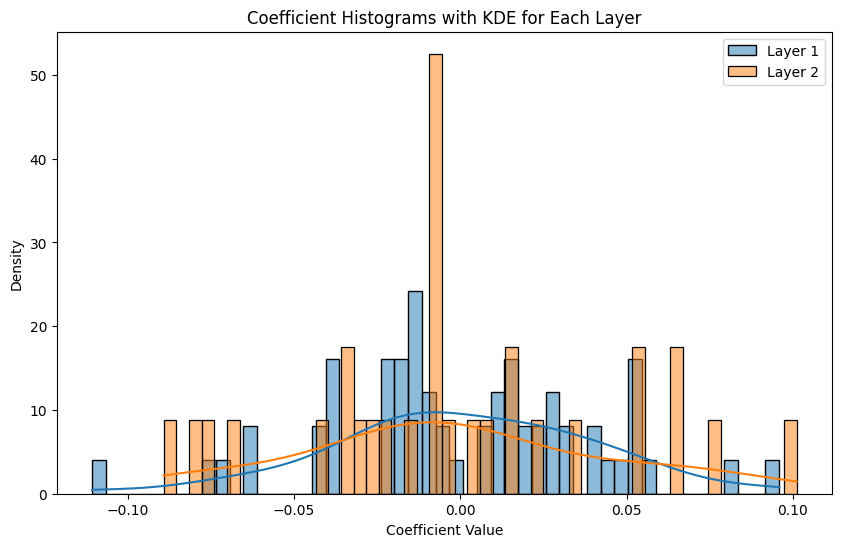

In [15]:
# Plot bar chart of coefficients
plt.figure(figsize=(10, 6))
flat_coefs = [c for coef in coefs for c in coef.flatten()]
#flat_coefs = [c.flatten() for c in coefs]
plt.bar(range(len(flat_coefs)), flat_coefs)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Kolmogorov-Arnold Network')
plt.show()

# # Plot histograms of coefficients by layer
# plt.figure(figsize=(10, 6))
# for i, layer_coef in enumerate(coefs):
#     plt.hist(layer_coef.flatten(), bins=50, alpha=0.5, label=f'Layer {i + 1}')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Frequency')
# plt.title('Combined Histogram of Coefficients for All Layers')
# plt.legend()
# plt.show()

# Plot histograms with KDE for each layer
plt.figure(figsize=(10, 6))
for i, layer_coef in enumerate(coefs):
    sns.histplot(layer_coef.flatten(), bins=50, kde=True, stat="density", alpha=0.5, label=f'Layer {i + 1}')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.title('Coefficient Histograms with KDE for Each Layer')
plt.legend()
plt.show()

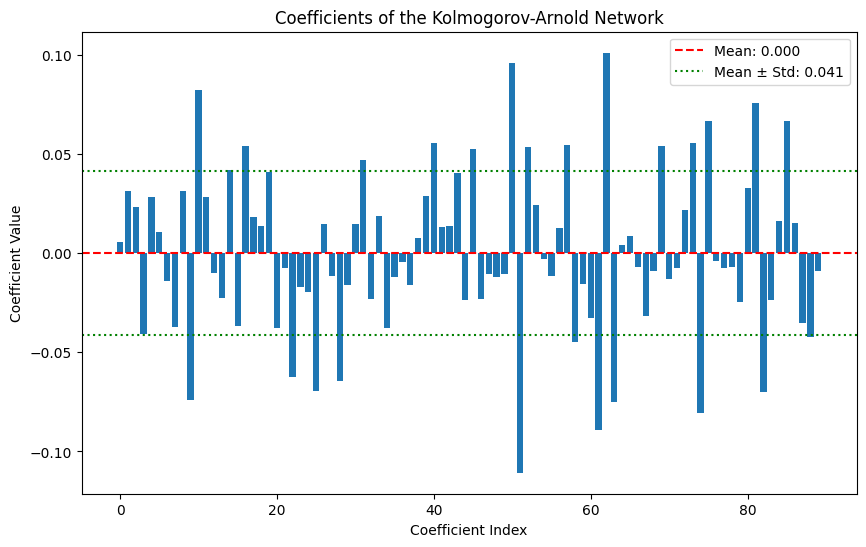

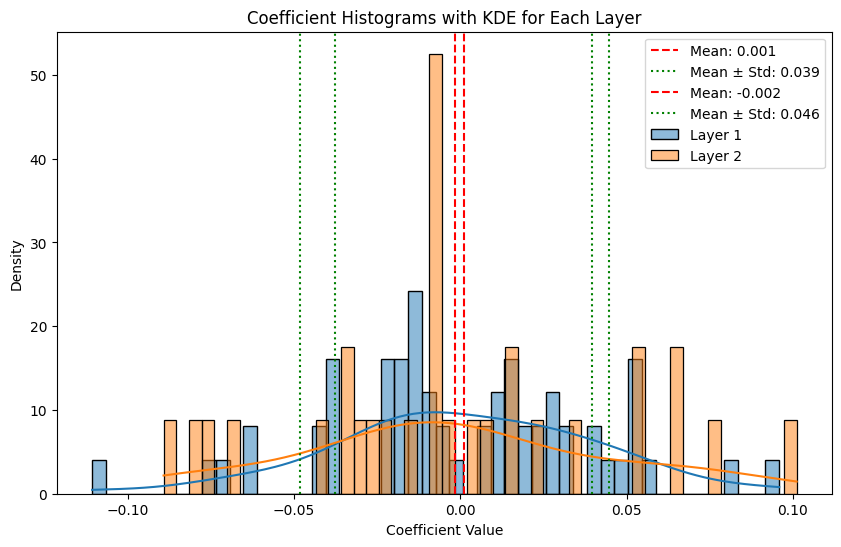

In [16]:
import numpy as np

# Plot bar chart of coefficients with mean and std lines
plt.figure(figsize=(10, 6))
flat_coefs = [c for coef in coefs for c in coef.flatten()]
mean = np.mean(flat_coefs)
std = np.std(flat_coefs)

plt.bar(range(len(flat_coefs)), flat_coefs)
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axhline(y=mean+std, color='g', linestyle=':', label=f'Mean ± Std: {std:.3f}')  
plt.axhline(y=mean-std, color='g', linestyle=':')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value') 
plt.title(f'Coefficients of the Kolmogorov-Arnold Network')
plt.legend()
plt.show()

# Plot histograms with KDE for each layer
plt.figure(figsize=(10, 6))
for i, layer_coef in enumerate(coefs):
    mean = np.mean(layer_coef.flatten())
    std = np.std(layer_coef.flatten())
    sns.histplot(layer_coef.flatten(), bins=50, kde=True, stat="density", alpha=0.5, label=f'Layer {i + 1}')
    plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
    plt.axvline(x=mean+std, color='g', linestyle=':', label=f'Mean ± Std: {std:.3f}')
    plt.axvline(x=mean-std, color='g', linestyle=':')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.title('Coefficient Histograms with KDE for Each Layer')
plt.legend()
plt.show()

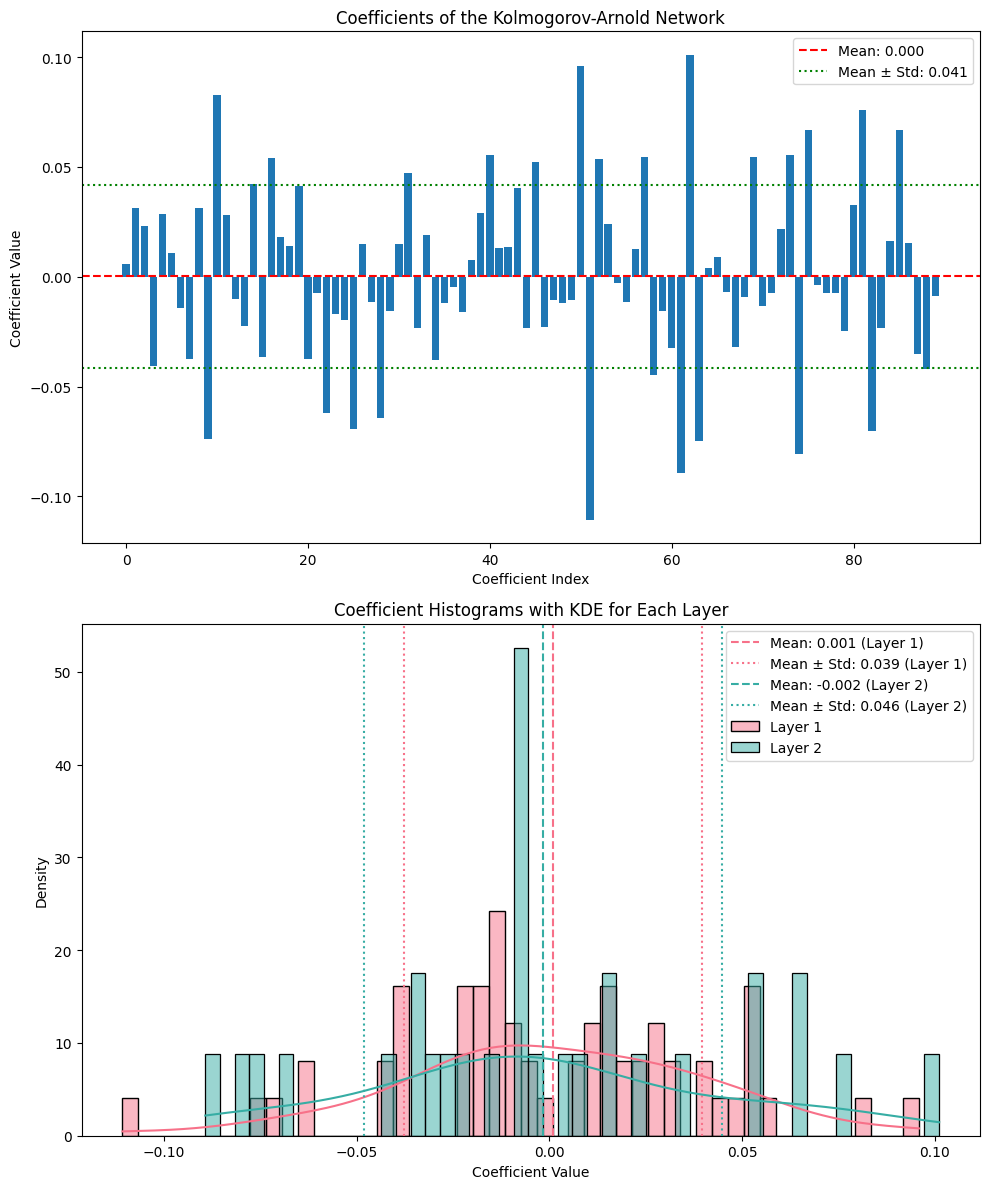

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coefs' is defined and contains the coefficients for each layer

# Create a single figure with two subplots
plt.figure(figsize=(10, 12))

# Plot bar chart of coefficients with mean and std lines in the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
flat_coefs = [c for coef in coefs for c in coef.flatten()]
mean = np.mean(flat_coefs)
std = np.std(flat_coefs)

plt.bar(range(len(flat_coefs)), flat_coefs)
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axhline(y=mean + std, color='g', linestyle=':', label=f'Mean ± Std: {std:.3f}')  
plt.axhline(y=mean - std, color='g', linestyle=':')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value') 
plt.title('Coefficients of the Kolmogorov-Arnold Network')
plt.legend()

# Plot histograms with KDE for each layer in the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
colors = sns.color_palette("husl", len(coefs))  # Generate a color palette

for i, layer_coef in enumerate(coefs):
    mean = np.mean(layer_coef.flatten())
    std = np.std(layer_coef.flatten())
    
    # Use the same color for the histogram and the axvlines
    color = colors[i]
    
    sns.histplot(layer_coef.flatten(), bins=50, kde=True, stat="density", alpha=0.5, color=color, label=f'Layer {i + 1}')
    plt.axvline(x=mean, color=color, linestyle='--', label=f'Mean: {mean:.3f} (Layer {i + 1})')
    plt.axvline(x=mean + std, color=color, linestyle=':', label=f'Mean ± Std: {std:.3f} (Layer {i + 1})')
    plt.axvline(x=mean - std, color=color, linestyle=':')

plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.title('Coefficient Histograms with KDE for Each Layer')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

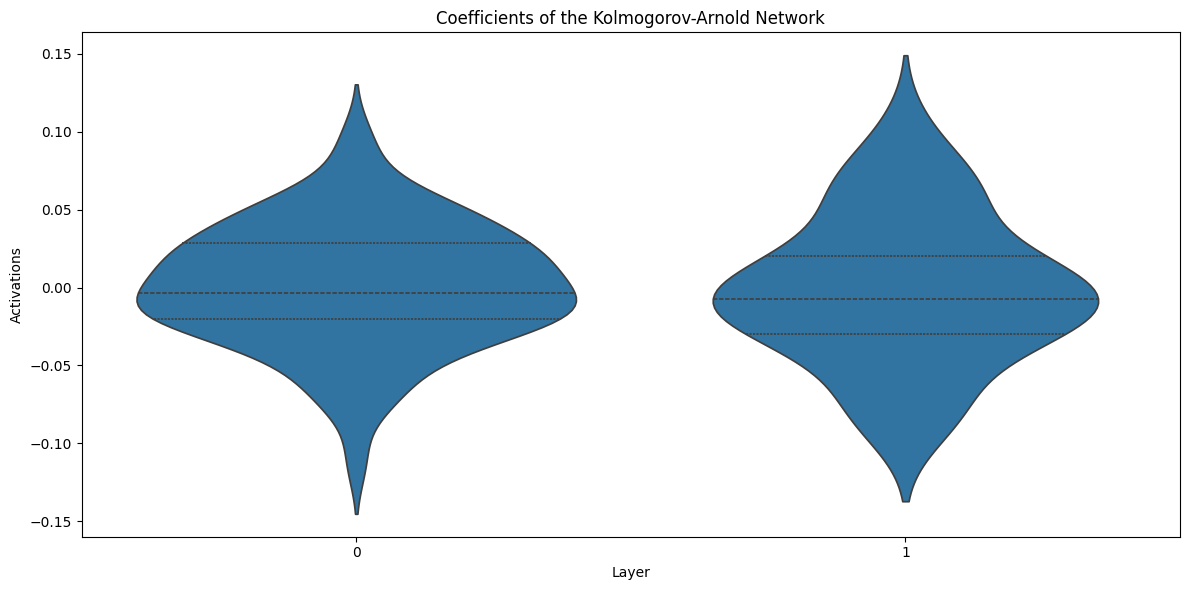

<Figure size 640x480 with 0 Axes>

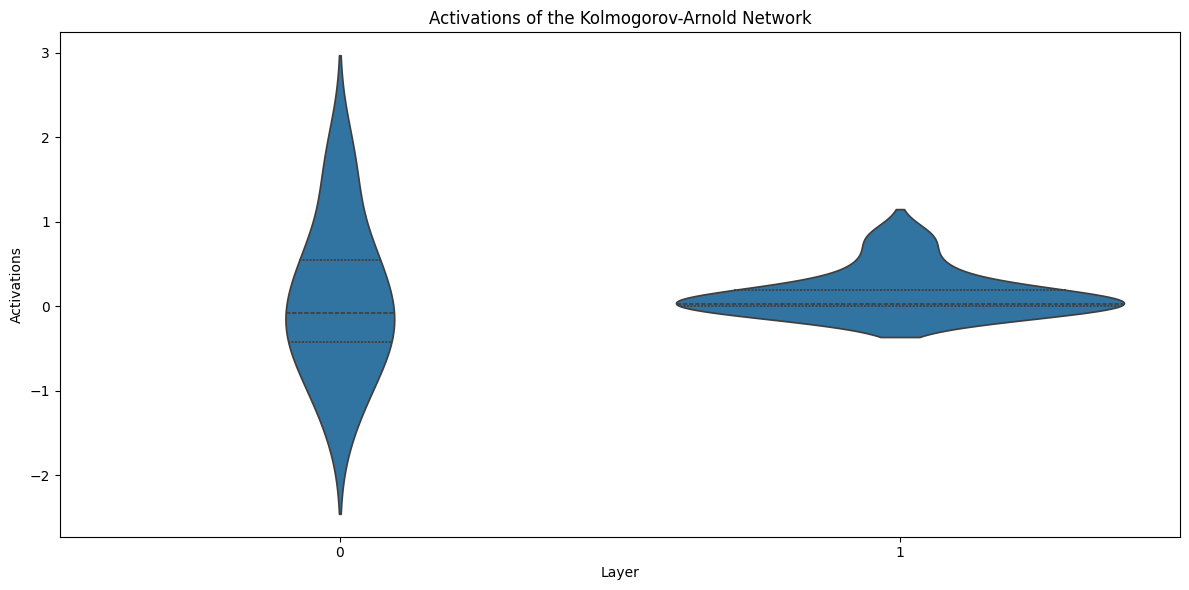

<Figure size 640x480 with 0 Axes>

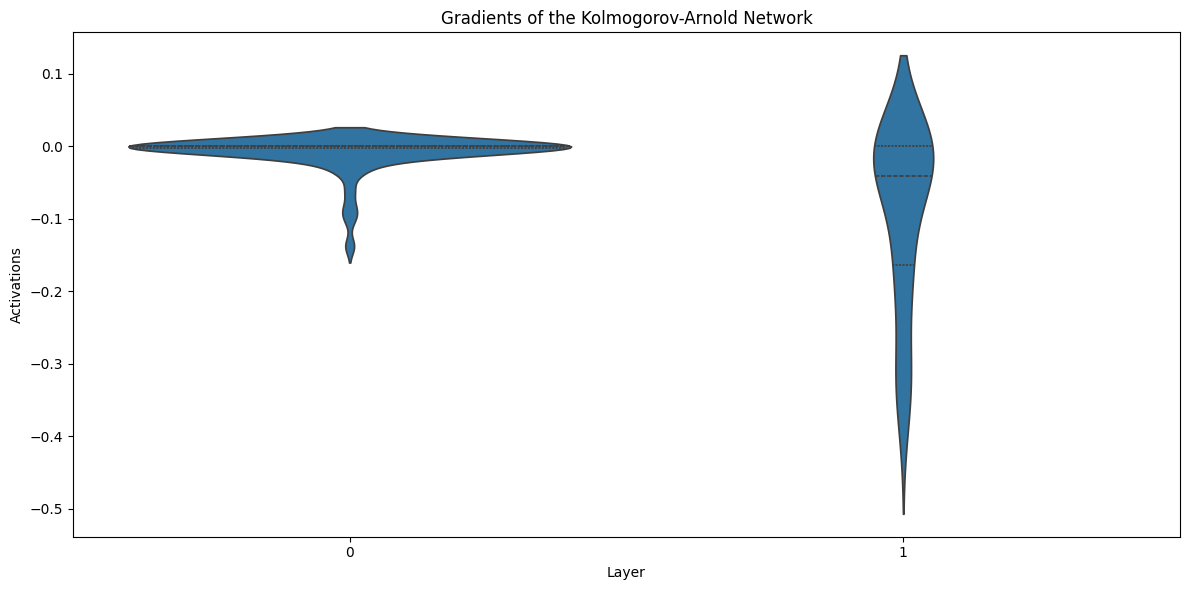

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violins(model, title, mode="act", sample_size=100):
    data = []
    for layer_index, (act_fun, acts, preacts, postacts, postsplines) in enumerate(zip(model.act_fun, model.acts, model.spline_preacts, model.spline_postacts, model.spline_postsplines)):
        
        coef = act_fun.coef

        dist_np = None  # Changed from acts_np to dist_np
        if mode == "coef":
            dist_np = coef.detach().numpy()
        elif mode == "act":
            dist_np = postacts.detach().numpy()
        elif mode == "grad":
            dist_np = coef.grad.detach().numpy()

        # Ensure dist_np is a 1D array
        dist_np = dist_np.flatten()

        # Sample a subset of activations if there are more than sample_size
        if len(dist_np) > sample_size:
            sampled_acts = np.random.choice(dist_np, sample_size, replace=False)
        else:
            sampled_acts = dist_np  # Use all if less than sample_size
        
        # Append layer index and sampled activations to the data list
        data.extend([(layer_index, act) for act in sampled_acts])

    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=['Layer', 'Activation'])

    plt.figure(figsize=(12, 6))

    # Create a violin plot
    sns.violinplot(data=df, x="Layer", y="Activation", inner="quart")

    # Adding labels and title
    plt.title(title)
    plt.xlabel('Layer')
    plt.ylabel('Activations')
    plt.tight_layout()

    # Show plot
    plt.show()
    return plt.gcf()

# Example usage
plot_violins(model, "Coefficients of the Kolmogorov-Arnold Network", mode="coef", sample_size=100)
plot_violins(model, "Activations of the Kolmogorov-Arnold Network", mode="act", sample_size=100)
plot_violins(model, "Gradients of the Kolmogorov-Arnold Network", mode="grad", sample_size=100)

# Activations

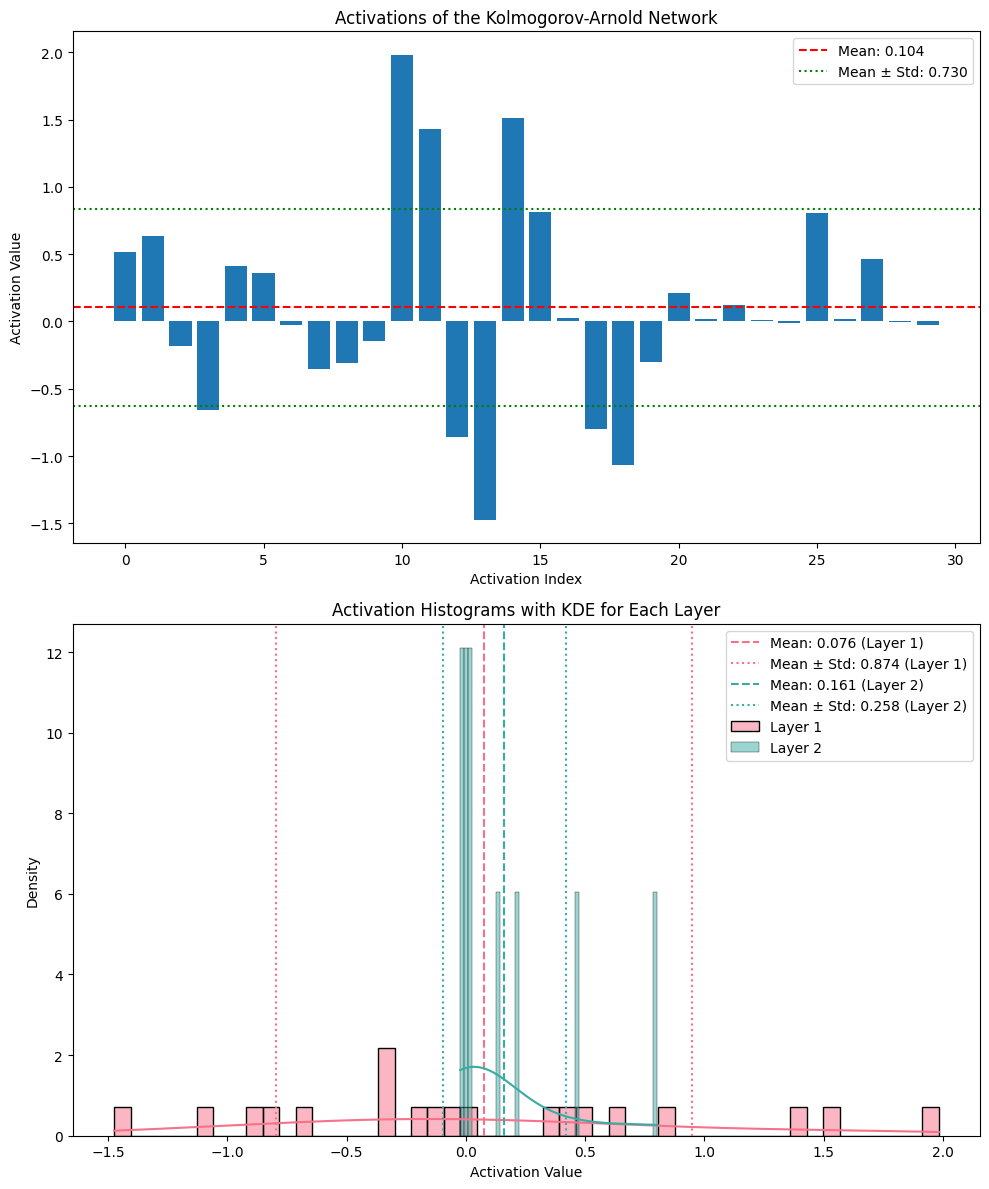

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'activations' is defined and contains the activations for each layer

# Create a single figure with two subplots
plt.figure(figsize=(10, 12))

# Plot bar chart of activations with mean and std lines in the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
flat_activations = [a for act in activations for a in act.flatten()]
mean = np.mean(flat_activations)
std = np.std(flat_activations)

plt.bar(range(len(flat_activations)), flat_activations)
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axhline(y=mean + std, color='g', linestyle=':', label=f'Mean ± Std: {std:.3f}')  
plt.axhline(y=mean - std, color='g', linestyle=':')
plt.xlabel('Activation Index')
plt.ylabel('Activation Value')
plt.title('Activations of the Kolmogorov-Arnold Network')
plt.legend()

# Plot histograms with KDE for each layer in the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
colors = sns.color_palette("husl", len(activations))  # Generate a color palette

for i, layer_act in enumerate(activations):
    mean = np.mean(layer_act.flatten())
    std = np.std(layer_act.flatten())
    
    # Use the same color for the histogram and the axvlines
    color = colors[i]
    
    sns.histplot(layer_act.flatten(), bins=50, kde=True, stat="density", alpha=0.5, color=color, label=f'Layer {i + 1}')
    plt.axvline(x=mean, color=color, linestyle='--', label=f'Mean: {mean:.3f} (Layer {i + 1})')
    plt.axvline(x=mean + std, color=color, linestyle=':', label=f'Mean ± Std: {std:.3f} (Layer {i + 1})')
    plt.axvline(x=mean - std, color=color, linestyle=':')

plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.title('Activation Histograms with KDE for Each Layer')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Gradient

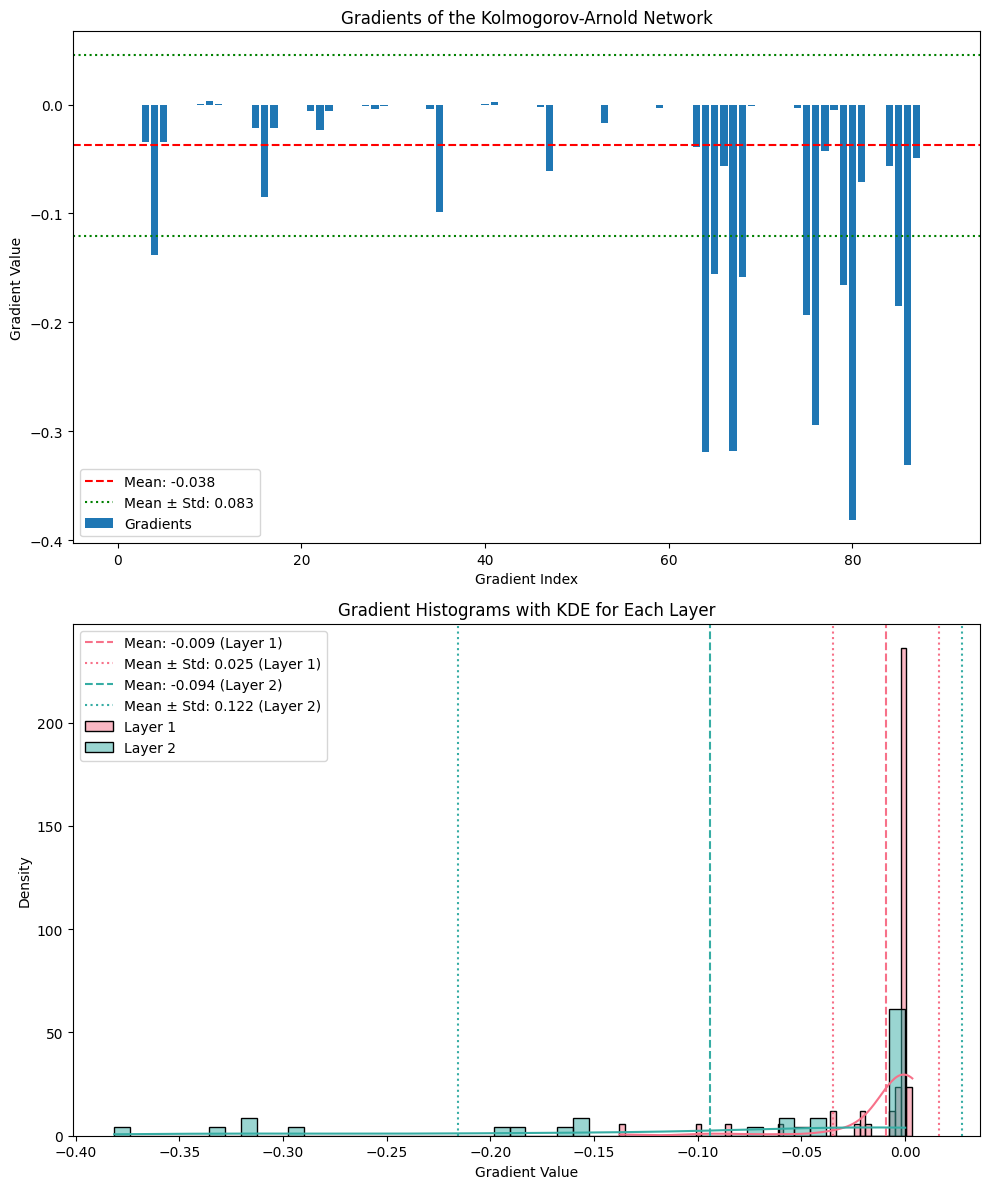

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gradients' is defined and contains the gradients for each layer

# Create a single figure with two subplots
plt.figure(figsize=(10, 12))

# Plot bar chart of gradients with mean and std lines in the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
flat_gradients = [g for grad in gradients for g in grad.flatten()]
mean = np.mean(flat_gradients)
std = np.std(flat_gradients)

plt.bar(range(len(flat_gradients)), flat_gradients, label=f'Gradients')
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axhline(y=mean + std, color='g', linestyle=':', label=f'Mean ± Std: {std:.3f}')  
plt.axhline(y=mean - std, color='g', linestyle=':')
plt.xlabel('Gradient Index')
plt.ylabel('Gradient Value')
plt.title('Gradients of the Kolmogorov-Arnold Network')
plt.legend()

# Plot histograms with KDE for each layer in the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
colors = sns.color_palette("husl", len(gradients))  # Generate a color palette

for i, layer_grad in enumerate(gradients):
    mean = np.mean(layer_grad.flatten())
    std = np.std(layer_grad.flatten())
    
    # Use the same color for the histogram and the axvlines
    color = colors[i]
    
    sns.histplot(layer_grad.flatten(), bins=50, kde=True, stat="density", alpha=0.5, color=color, label=f'Layer {i + 1}')
    plt.axvline(x=mean, color=color, linestyle='--', label=f'Mean: {mean:.3f} (Layer {i + 1})')
    plt.axvline(x=mean + std, color=color, linestyle=':', label=f'Mean ± Std: {std:.3f} (Layer {i + 1})')
    plt.axvline(x=mean - std, color=color, linestyle=':')

plt.xlabel('Gradient Value')
plt.ylabel('Density')
plt.title('Gradient Histograms with KDE for Each Layer')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()